<a href="https://colab.research.google.com/github/project4sharing/pycaret_exp/blob/main/direct_pycaret_application_to_creditcard_fraud_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

This example demonstrates the direct application of PyCaret framework to the Kaggle CreditCard Fraud Dataset


## Data - Data Sources
Credit Card Fraud data source hosted in Kaggle contributed by Dhanush NaraYanan R.

https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud/data

This data source is licensed under "CC0: Publich Domain".

Data source is a single ~76Mb data file and containes 1MM samples of 8 features:
1. distance_from_home - numberic - Distance from credit card registration address
2. distance_from_last_transaction - numeric - Distance of the current transation from the previous transaction on the same credit card
3. ratio_to_median_purchase_price - numeric - Ratio of current charge to median purchase price
4. repeat_retailer - categorical - current charge made to frequent store / retailer
5. used_chip - categorical - IC chip used to authorize charge
6. used_pin_number - categorical - PIN used to authorize charge
7. online_order - categorical - current charge made for online purchase
8. fraud - categorical - prediction of whether charge may be fraudulent - this is the target variable that we would like to predict

At a first glance, the initial intuition is feature #1, #2, #5, #6 are "card present" type of purchases, ie, card holder makes purchase in person.

In [4]:
# Acquire prerequisite packages
!pip install gdown
!pip install --upgrade seaborn
!pip install pycaret[full]

In [3]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree

from imblearn.over_sampling import SMOTENC

# from pycaret.classification import *
from pycaret.classification import ClassificationExperiment

from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings

import gdown

warnings.filterwarnings('ignore')

In [3]:
# In order to make this notebook self-sufficient, data has already been persisted in my google drive
# This is to prevent saving my Kaggle key to download the dataset on the fly

gdown.download('https://drive.google.com/uc?id=1cq3EBN238kBUW4R0u4rDYlyv9HqvqsDo', './card_transdata.csv')

Downloading...
From: https://drive.google.com/uc?id=1cq3EBN238kBUW4R0u4rDYlyv9HqvqsDo
To: /home/jovyan/workspace/pycaret_exp/card_transdata.csv
100%|██████████| 76.3M/76.3M [00:21<00:00, 3.52MB/s]


'./card_transdata.csv'

In [4]:
df_credit_card_fraud_org = pd.read_csv('./card_transdata.csv', sep=',', header=0, index_col=False, engine='python')

In [5]:
df_credit_card_fraud_org.info()

numerical_features = [
    'distance_from_home',
    'distance_from_last_transaction',
    'ratio_to_median_purchase_price'
    ]
categorical_features = [
    'repeat_retailer',
    'used_chip',
    'used_pin_number',
    'online_order'
    ]
target_feature = 'fraud'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [6]:
# constants
random_seed = 12345

bootstrap_algo = [
    # 'ada',
    # 'catboost',
    'dt',
    # 'et',
    # 'gbc',
    # 'gpc',
    # 'knn', 
    # 'lda',
    # 'lightgbm',
    # 'lr',
    # 'mlp',
    # 'nb', 
    # 'rbfsvm',
    'rf',
    # 'ridge',
    # 'svm',
    # 'qda',
    # 'xgboost'
    ]

In [7]:

exp = ClassificationExperiment()
exp.setup(
    data = df_credit_card_fraud_org,
    target = target_feature,
    numeric_features = numerical_features,
    categorical_features = categorical_features,
    fix_imbalance = True,
    pca = False,
    feature_selection = True,
    data_split_shuffle = True,
    data_split_stratify = True,
    n_jobs = -1,
    # log_experiment = True,
    experiment_name = "202407191340",
    session_id = random_seed)

,Description,Value
0,Session id,12345
1,Target,fraud
2,Target type,Binary
3,Original data shape,"(1000000, 8)"
4,Transformed data shape,"(1577636, 2)"
5,Transformed train set shape,"(1277636, 2)"
6,Transformed test set shape,"(300000, 2)"
7,Numeric features,3
8,Categorical features,4
9,Preprocess,True


In [8]:
# list all available algorithms for classification

exp.models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [ ]:
# Compare various models native in PyCaret
best_mdl = exp.compare_models(include=bootstrap_algo)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,12:19:52
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Decision Tree Classifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)


Processing:   0%|          | 0/13 [00:00<?, ?it/s]

In [10]:
s.models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [11]:
test = s.pull()

In [16]:
print(dir(s))

['USI', 'X', 'X_test', 'X_test_transformed', 'X_train', 'X_train_transformed', 'X_transformed', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_add_custom_pipeline', '_all_metrics', '_all_models', '_all_models_internal', '_attributes_to_not_save', '_available_plots', '_balance', '_bin_numerical_features', '_calculate_metrics', '_check_environment', '_check_setup_ran', '_choose_better', '_clean_column_names', '_convert_log_experiment', '_create_app_predict_kwargs', '_create_model', '_create_model_get_train_X_y', '_create_model_with_cv', '_create_model_without_cv', '_date_feature_engineering', '_display_container', '_encode_target_column', '_encoding', '_feature_selection', '_fxs

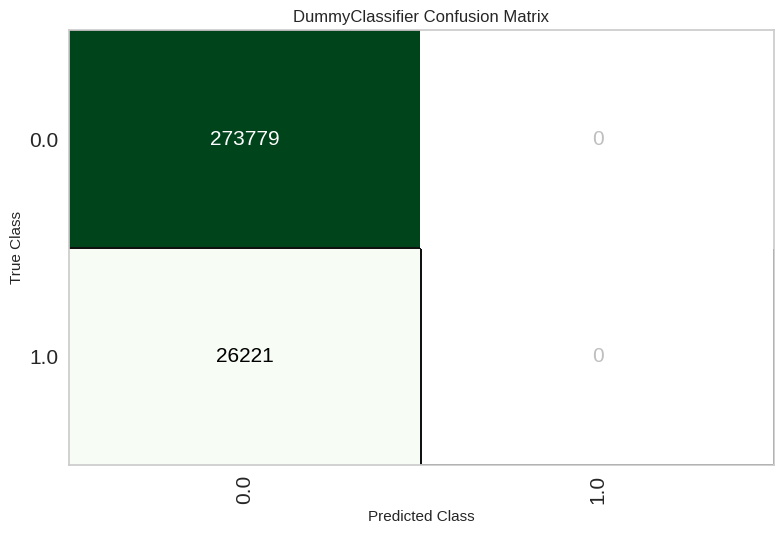

In [18]:
s.plot_model(best, plot = 'confusion_matrix')

In [19]:
s.plot_model(best, plot = 'feature')

TypeError: Feature Importance and RFE plots not available for estimators that doesnt support coef_ or feature_importances_ attribute.